<a href="https://colab.research.google.com/github/leSIMPus/lab1-algorithms/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2 Парсинг


### **Теоретический материал к Лабораторной работе №2**

**Тема: Основы автоматизированного сбора данных из веб-источников**

#### **Введение: от веб-страницы к структурированным данным**

Современный Интернет представляет собой крупнейший в истории человечества источник информации. Однако эти данные, как правило, представлены в неструктурированном, человекочитаемом формате — в виде веб-страниц. Процесс автоматического извлечения данных с веб-сайтов и их преобразования в структурированный, машиночитаемый вид (например, в таблицу или базу данных) получил название **веб-парсинг** (от англ. *to parse* — анализировать, разбирать) или **веб-скрейпинг** (*to scrape* — соскребать).

Для выполнения этой задачи мы будем использовать экосистему из нескольких специализированных библиотек Python, каждая из которых выполняет свою строго определенную функцию. В данной работе мы сосредоточимся на двух основных инструментах для работы со статичными сайтами.

---

#### **1. Библиотека `requests`: Протокол взаимодействия с веб-сервером**

Любое взаимодействие в сети Интернет начинается с отправки запроса. Когда вы вводите адрес сайта в браузере, он отправляет HTTP-запрос к серверу, на котором этот сайт расположен. Сервер в ответ присылает HTML-документ, который браузер и отображает.

Библиотека `requests` является отраслевым стандартом в Python для выполнения этой задачи программным путем. Её основная функция — абстрагироваться от сложностей сетевых протоколов и предоставить простой интерфейс для отправки HTTP-запросов.

**Ключевые концепции и синтаксис:**

1.  **Отправка GET-запроса:** Основной метод, который мы используем, — `requests.get()`. Он эмулирует переход по URL-адресу в браузере.

    ```python
    import requests

    # URL-адрес целевого ресурса
    url = 'http://quotes.toscrape.com/'

    # Отправка запроса. Вся информация об ответе сервера будет храниться в объекте 'response'
    response = requests.get(url)
    ```

2.  **Объект ответа (`response`):** Результатом вызова `requests.get()` является объект, содержащий всю информацию об ответе сервера. Наиболее важные для нас атрибуты:
    *   `response.status_code`: Числовой код состояния HTTP. Успешный запрос возвращает код **200**. Коды, начинающиеся с 4 (например, 404 Not Found) или 5 (например, 500 Internal Server Error), свидетельствуют об ошибках. Проверка этого кода — обязательный шаг для написания надежного парсера.
    *   `response.text`: Содержимое ответа сервера в виде текстовой строки. В нашем случае это будет полный HTML-код запрошенной страницы.

    **Пример использования:**

    ```python
    if response.status_code == 200:
        print("Запрос выполнен успешно.")
        # Получаем HTML-код страницы
        html_content = response.text
        print("Длина полученного HTML-документа:", len(html_content), "символов.")
    else:
        print("Произошла ошибка при запросе. Код:", response.status_code)
    ```

На данном этапе `requests` свою задачу выполнил: мы получили "сырой" HTML-документ. Далее его необходимо проанализировать.

---

#### **2. Библиотека `BeautifulSoup`: Навигация по DOM-структуре документа**

HTML-документ — это не просто текст, а строго иерархическая структура, описываемая с помощью тегов. Эту структуру принято называть **DOM-деревом** (Document Object Model). Библиотека `BeautifulSoup` является мощнейшим инструментом для парсинга этого дерева. Она преобразует текстовую строку HTML в объектную модель, по которой можно осуществлять удобную навигацию и поиск.

**Ключевые концепции и синтаксис:**

1.  **Инициализация объекта ("создание супа"):** Первым шагом является создание экземпляра класса `BeautifulSoup`, который принимает на вход HTML-текст и название парсера.

    ```python
    from bs4 import BeautifulSoup

    # html_content - это строка, полученная от requests.text
    soup = BeautifulSoup(html_content, 'html.parser')
    ```

2.  **Поиск элементов:** `BeautifulSoup` предоставляет два основных метода для поиска тегов внутри DOM-дерева. Они используют **селекторы** — комбинации имени тега и его атрибутов (например, `class` или `id`).

    *   **`soup.find(tag, attributes)`**: Ищет **первый** элемент, соответствующий заданным критериям, и возвращает его как объект тега. Если ничего не найдено, возвращает `None`.

      **Синтаксис:**
      ```python
      # Поиск первого тега <h1>
      first_h1 = soup.find('h1')

      # Поиск первого тега <span> с атрибутом class='text'
      # ВАЖНО: 'class' - зарезервированное слово в Python, поэтому используется аргумент 'class_'
      first_quote_text = soup.find('span', class_='text')
      ```

    *   **`soup.find_all(tag, attributes)`**: Ищет **все** элементы, соответствующие критериям, и возвращает их в виде списка (`list`). Если ничего не найдено, возвращает пустой список.

      **Синтаксис:**
      ```python
      # Поиск всех тегов <div> с атрибутом class='quote'
      all_quote_containers = soup.find_all('div', class_='quote')

      # Итерация по результатам
      for container in all_quote_containers:
          # Внутри каждого найденного контейнера можно продолжать поиск
          author = container.find('small', class_='author')
          print(author.text)
      ```

3.  **Извлечение содержимого из найденных тегов:** После того как тег найден, из него можно извлечь полезную информацию.
    *   **`.text`**: Возвращает все текстовое содержимое внутри тега и его дочерних элементов в виде одной строки.
    *   **`tag['attribute_name']`**: Позволяет получить значение конкретного атрибута тега. Чаще всего используется для извлечения ссылок из атрибута `href` у тега `<a>`.

      **Пример использования:**
      ```python
      # Найдем тег с цитатой
      quote_element = soup.find('div', class_='quote')

      # Извлекаем текст цитаты
      text = quote_element.find('span', class_='text').text
      print("Текст цитаты:", text)

      # Извлекаем ссылку на автора (если она есть)
      author_link = quote_element.find('a') # Находим первый тег <a> внутри контейнера
      if author_link:
          href_value = author_link['href']
          print("Ссылка на страницу автора:", href_value)
      ```



Рассмотренный ранее подход с использованием библиотек `requests` и `BeautifulSoup` является высокоэффективным для работы со **статичными** веб-страницами. "Статичная" страница — это документ, HTML-код которого полностью формируется на сервере и доставляется клиенту в готовом виде. Однако значительная часть современного веба функционирует иначе.

**Динамические веб-сайты** активно используют технологию JavaScript для модификации своего содержимого непосредственно в браузере пользователя *после* первоначальной загрузки страницы. Это может быть подгрузка новостной ленты при прокрутке, отображение цен на авиабилеты после выбора маршрута, обновление графика погоды в реальном времени.

При попытке парсинга таких сайтов с помощью `requests`, мы получим лишь базовый HTML-шаблон, в котором искомые данные будут отсутствовать, поскольку JavaScript-код, ответственный за их загрузку и отображение, не будет исполнен.

Для решения этой фундаментальной проблемы необходим инструмент, который не просто запрашивает HTML, а эмулирует поведение полноценного веб-браузера. Таким инструментом является библиотека **Selenium**.

---

#### **1. Парадигма Selenium: Управление браузером вместо отправки запросов**

Основное отличие Selenium от `requests` заключается в подходе. Если `requests` — это "курьер", доставляющий HTML-документ, то **Selenium — это "робот-пользователь"**, который программно запускает и управляет реальным браузером (Google Chrome, Firefox и др.).

Этот подход позволяет:
*   **Исполнять JavaScript:** Браузер под управлением Selenium загружает и выполняет все скрипты на странице.
*   **Взаимодействовать с элементами:** Selenium может эмулировать действия пользователя, такие как клики по кнопкам, ввод текста в поля, прокрутку страницы.
*   **Работать с итоговым HTML:** После всех динамических модификаций мы получаем доступ к финальному, "отрисованному" DOM-дереву, которое и видит пользователь.

---

#### **2. Ключевые компоненты и синтаксис Selenium**

##### **2.1. WebDriver: Мост между кодом и браузером**

Центральным элементом Selenium является **WebDriver**. Это программный интерфейс (API), который выступает в роли "драйвера" или "переводчика" между командами в вашем Python-скрипте и действиями в реальном приложении браузера.

**Инициализация WebDriver:**
Для начала работы необходимо создать экземпляр WebDriver для конкретного браузера. Современные версии Selenium (`4.6.0` и новее) автоматически управляют загрузкой необходимого драйвера.

```python
from selenium import webdriver

# Инициализация драйвера для Google Chrome.
# Selenium сам скачает и настроит chromedriver.
driver = webdriver.Chrome()

# Команда ниже откроет окно браузера Chrome
```

##### **2.2. Навигация и получение страницы**
Основной метод для загрузки страницы — `driver.get(url)`.

```python
url = 'https://www.gismeteo.ru/weather-moscow-4368/'
driver.get(url) # Браузер откроется и перейдет по указанному адресу
```

##### **2.3. Проблема асинхронности и механизмы ожидания**

Это **самая важная и сложная концепция** при работе с Selenium. Ваш Python-скрипт выполняется гораздо быстрее, чем браузер успевает загрузить страницу и выполнить все JavaScript-команды. Если вы попытаетесь найти элемент сразу после вызова `driver.get()`, скорее всего, вы получите ошибку `NoSuchElementException`, потому что элемент еще не появился на странице.

**Неправильный подход:** `time.sleep(5)`. Использование жестких пауз — плохая практика. Пауза может быть слишком короткой (данные не успеют загрузиться) или слишком длинной (скрипт будет работать неэффективно).

**Правильный подход: Явные ожидания (Explicit Waits)**
Это механизм, который заставляет WebDriver ждать наступления определенного события (например, появления элемента) в течение заданного максимального времени.

**Синтаксис:**
```python
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Создаем объект ожидания: ждать максимум 10 секунд
wait = WebDriverWait(driver, 10)

# Команда "ждать, пока элемент с указанным локатором не станет присутствовать в DOM"
# By.CLASS_NAME — это способ поиска (локатор)
# 'unit_temperature_c' — значение локатора
temperature_element = wait.until(
    EC.presence_of_element_located((By.CLASS_NAME, 'unit_temperature_c'))
)
```

##### **2.4. Поиск элементов и взаимодействие с ними**

Для поиска элементов Selenium использует **локаторы**, которые указывают, *как* именно искать элемент. Они импортируются из `selenium.webdriver.common.by.By`.

Основные локаторы:
*   `By.ID`
*   `By.CLASS_NAME`
*   `By.TAG_NAME`
*   `By.XPATH` (самый мощный и сложный)
*   `By.CSS_SELECTOR` (часто самый удобный)

**Методы поиска:**
*   `driver.find_element(By.ЛОКАТОР, 'значение')`: Ищет **первый** элемент.
*   `driver.find_elements(By.ЛОКАТОР, 'значение')`: Ищет **все** элементы и возвращает список.

**Методы взаимодействия:**
*   `.click()`: Кликнуть по элементу.
*   `.send_keys('текст')`: Ввести текст в поле ввода.
*   `.text`: Получить видимый текст элемента.
*   `.get_attribute('атрибут')`: Получить значение атрибута (например, `href`).

**Пример:**
```python
# Найти поле поиска по его ID
search_box = driver.find_element(By.ID, 'search-input')

# Ввести текст в поле
search_box.send_keys('Погода в Санкт-Петербурге')

# Найти и кликнуть по кнопке поиска
search_button = driver.find_element(By.CLASS_NAME, 'search-button')
search_button.click()
```

##### **2.5. Интеграция с BeautifulSoup и завершение работы**

После того как Selenium выполнил все необходимые действия (клики, прокрутку) и дождался появления данных, мы можем получить итоговый HTML-код страницы.

*   `driver.page_source`: Атрибут, содержащий финальный HTML-код страницы в виде строки.

Этот код можно передать в `BeautifulSoup` для более удобного и быстрого парсинга, комбинируя сильные стороны обеих библиотек.

**Обязательный шаг: Завершение сессии**
После окончания работы необходимо закрыть браузер и завершить сессию WebDriver, чтобы освободить системные ресурсы.

*   `driver.quit()`: Закрывает все окна браузера и завершает процесс WebDriver.




### Requests

In [1]:
import requests
import json # Библиотека для работы с JSON

# --- ШАГ 1: Определение цели ---
# URL API для получения репозиториев пользователя.
# Обратите внимание, что это не обычный URL для браузера!
api_base_url = "https://api.github.com/users/"
username = "gvanrossum"
full_api_url = f"{api_base_url}{username}/repos"

# --- ШАГ 2: Использование параметров запроса (params) ---
# API позволяет настраивать вывод. Мы хотим отсортировать репозитории
# по дате создания ('created') и получать по 10 штук за раз.
# Для этого используются GET-параметры, которые requests умеет добавлять к URL.

# --- ЗАДАНИЕ ---
# Создайте словарь 'params', который будет содержать следующие GET-параметры:
# 1. 'sort': со значением 'created' (сортировка по дате создания)
# 2. 'per_page': со значением '10' (выводить по 10 репозиториев на странице)
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
params = {
    '???': 'created',
    '???': '10'
}
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲


# --- ШАГ 3: Выполнение запроса и обработка JSON ---
print(f"Отправляю запрос на: {full_api_url}")
response = requests.get(full_api_url, params=params)

if response.status_code == 200:
    print("Запрос успешен!")
    # --- ЗАДАНИЕ ---
    # Ответ от API приходит в формате JSON.
    # У объекта response есть специальный метод .json(), который
    # автоматически преобразует этот ответ в python-объект (список словарей).
    # Используйте его и сохраните результат в переменную 'repos_data'.
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    repos_data = response.json()
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

    # --- ШАГ 4: Вывод результатов ---
    print(f"Последние 10 созданных репозиториев пользователя {username}:")
    # Пройдемся циклом по списку репозиториев и выведем их названия и URL
    for repo in repos_data:
        print(f"  - Название: {repo['name']}, URL: {repo['html_url']}")

else:
    print(f"Ошибка! Статус-код: {response.status_code}")
    print(f"Сообщение: {response.text}")

Отправляю запрос на: https://api.github.com/users/gvanrossum/repos
Запрос успешен!
Последние 10 созданных репозиториев пользователя gvanrossum:
  - Название: 500lines, URL: https://github.com/gvanrossum/500lines
  - Название: asyncio, URL: https://github.com/gvanrossum/asyncio
  - Название: ballot-box, URL: https://github.com/gvanrossum/ballot-box
  - Название: c-parser, URL: https://github.com/gvanrossum/c-parser
  - Название: cpython, URL: https://github.com/gvanrossum/cpython
  - Название: ctok, URL: https://github.com/gvanrossum/ctok
  - Название: devguide, URL: https://github.com/gvanrossum/devguide
  - Название: exceptiongroup, URL: https://github.com/gvanrossum/exceptiongroup
  - Название: guidos_time_machine, URL: https://github.com/gvanrossum/guidos_time_machine
  - Название: gvanrossum.github.io, URL: https://github.com/gvanrossum/gvanrossum.github.io
  - Название: http-get-perf, URL: https://github.com/gvanrossum/http-get-perf
  - Название: minithesis, URL: https://github.co

Найден абсолютный URL логотипа: https://vk.com/images/mobile/icons/vk_logo_color_32.png
Скачиваю изображение...
Изображение успешно скачано!
Файл 'logo.png' сохранен в текущую директорию Colab.


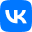

In [3]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image # Для отображения картинки в Colab

# --- ШАГ 1: Найти URL изображения ---
# Сначала нам нужно, как в прошлой лабораторной, найти ссылку на логотип.
base_url = 'https://vk.com/'
response = requests.get(base_url)
soup = BeautifulSoup(response.text, 'html.parser')

# Логотип находится в теге <img> внутри тега <a> с href="/".
# --- ЗАДАНИЕ ---
# Найдите тег 'img' и извлеките из него значение атрибута 'src'.
# Сохраните относительный URL в переменную 'relative_logo_url'.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
logo_element = soup.find('a', href='/').find('img')
relative_logo_url = logo_element['src']
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

# --- ШАГ 2: Преобразование относительного URL в абсолютный ---
# Ссылка в 'src' относительная ('/images/logo.png').
# Чтобы ее скачать, нужен полный URL.
absolute_logo_url = urljoin(base_url, relative_logo_url)
print(f"Найден абсолютный URL логотипа: {absolute_logo_url}")


# --- ШАГ 3: Скачивание бинарного контента ---
print("Скачиваю изображение...")
# --- ЗАДАНИЕ ---
# Отправьте GET-запрос на 'absolute_logo_url'.
# Ответ для бинарных файлов нужно получать через атрибут .content, а не .text
# Сохраните результат в переменную 'image_content'.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
image_response = requests.get(absolute_logo_url)
if image_response.status_code == 200:
    image_content = image_response.content
    print("Изображение успешно скачано!")
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

    # --- ШАГ 4: Сохранение файла на диск ---
    # Используем стандартный синтаксис Python для записи файлов.
    # 'wb' означает "write binary" - запись в бинарном режиме.
    file_name = 'logo.png'
    # --- ЗАДАНИЕ ---
    # Откройте файл 'file_name' для записи в бинарном режиме ('wb')
    # и запишите в него 'image_content'.
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    with open(file_name, 'wb') as f:
        f.write(image_content)
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲
    print(f"Файл '{file_name}' сохранен в текущую директорию Colab.")

    # Отобразим скачанное изображение прямо в блокноте
    display(Image(file_name))
else:
    print(f"Ошибка при скачивании изображения! Статус-код: {image_response.status_code}")

In [4]:
import requests
from bs4 import BeautifulSoup

# --- ШАГ 1: Создание сессии и получение CSRF-токена ---
# requests.Session() - это объект, который будет "помнить" cookies между запросами.
# --- ЗАДАНИЕ ---
# Создайте объект сессии и сохраните его в переменную 'session'.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
session = requests.Session()
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

login_url = 'http://quotes.toscrape.com/login'

# Сначала делаем GET-запрос, чтобы получить страницу входа и специальный
# "csrf_token" - это защита от межсайтовой подделки запроса.
response_login_page = session.get(login_url)
soup_login = BeautifulSoup(response_login_page.text, 'html.parser')

# --- ЗАДАНИЕ ---
# Найдите тег 'input' у которого атрибут name равен 'csrf_token'
# и извлеките из него значение атрибута 'value'.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
csrf_token = soup_login.find('input', {'name': 'csrf_token'})['value']
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

print(f"Получен CSRF токен: {csrf_token}")


# --- ШАГ 2: Подготовка данных для POST-запроса ---
# Это данные, которые мы бы ввели в форму на сайте.
# Имена полей ('username', 'password') нужно посмотреть в HTML-коде страницы.
payload = {
    'csrf_token': csrf_token,
    'username': 'admin',  # Используем стандартные учетные данные для этого сайта
    'password': 'admin'
}


# --- ШАГ 3: Отправка POST-запроса для аутентификации ---
# Мы отправляем POST-запрос на тот же URL, но уже с нашими данными.
# Сессия автоматически сохранит cookies, которые вернет сервер после успешного входа.
# --- ЗАДАНИЕ ---
# Отправьте POST-запрос с помощью объекта 'session'.
# URL: login_url
# Данные: payload
# Сохраните ответ в 'response_post'.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
response_post = session.post(login_url, data=payload)
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲


# --- ШАГ 4: Доступ к защищенной странице ---
# Теперь, используя ту же сессию, мы можем зайти на любую страницу сайта,
# и сервер будет "видеть" нас как залогиненного пользователя.
print("\nПробую получить доступ к главной странице после логина...")
response_main_page = session.get('http://quotes.toscrape.com/')
soup_main = BeautifulSoup(response_main_page.text, 'html.parser')

# Проверим, видим ли мы кнопку "Logout"
logout_button = soup_main.find('a', href='/logout')

if logout_button:
    print("Успех! Мы авторизованы. Сервер видит кнопку 'Logout'.")
    print(logout_button.text)
else:
    print("Неудача. Авторизация не удалась, кнопка 'Logout' не найдена.")

Получен CSRF токен: RsXbLJwHSlVrvpkAxmyEfDFtQgcUnIMqBuGPOZjYCiaNehoKWdTz

Пробую получить доступ к главной странице после логина...
Успех! Мы авторизованы. Сервер видит кнопку 'Logout'.
Logout


### BeautifulSoup4

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# --- ШАГ 1: Получение HTML ---
url = 'http://books.toscrape.com/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# --- ШАГ 2: Поиск общего контейнера ---
# Все книги находятся внутри элементов <article> с классом 'product_pod'.
# --- ЗАДАНИЕ ---
# Найдите ВСЕ такие контейнеры с помощью .find_all() и сохраните в 'all_books'.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
all_books = soup.find_all('article', class_='product_pod')
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

print(f"Найдено книг на странице: {len(all_books)}")
books_data = []

# --- ШАГ 3: Извлечение данных в цикле ---
for book in all_books:
    # --- ЗАДАНИЕ A: Найти название книги ---
    # Название находится в теге <a> внутри тега <h3>.
    # Нужно извлечь его атрибут 'title'.
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    title = book.find('h3').find('a')['title']
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

    # --- ЗАДАНИЕ B: Найти цену ---
    # Цена находится в теге <p> с классом 'price_color'.
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    price = book.find('p', class_='price_color').text
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

    # --- ЗАДАНИЕ C: Найти рейтинг ---
    # Рейтинг находится в атрибуте 'class' у тега <p>, который начинается с 'star-rating'.
    # Например: <p class="star-rating Three">. Нам нужно извлечь слово 'Three'.
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    rating_container = book.find('p', class_='star-rating')
    # Атрибут 'class' возвращает список классов, например, ['star-rating', 'Three']
    rating = rating_container['class'][1] # Берем второй элемент
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

    # Добавляем собранные данные в наш список
    books_data.append({
        'Title': title,
        'Price': price,
        'Rating': rating
    })

# --- ШАГ 4: Вывод результата ---
df = pd.DataFrame(books_data)
display(df)

Найдено книг на странице: 20


,Title,Price,Rating
0,A Light in the Attic,Â£51.77,Three
1,Tipping the Velvet,Â£53.74,One
2,Soumission,Â£50.10,One
3,Sharp Objects,Â£47.82,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,Five
5,The Requiem Red,Â£22.65,One
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,Four
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,Three
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,Four
9,The Black Maria,Â£52.15,One


In [6]:
# --- Этап 1: Импорт библиотек ---
import requests
from bs4 import BeautifulSoup
import pandas as pd

# --- Этап 2: Подготовка к запросу ---

# URL страницы, с которой будем работать
url = 'https://ru.wikipedia.org/wiki/Python'

# Заголовки для имитации запроса от браузера. Это важная часть!
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# --- Этап 3: Получение и разбор HTML ---
try:
    print(f"Отправляем запрос на: {url}")
    # 1. ВАШ КОД ЗДЕСЬ: Отправьте GET-запрос на 'url' с использованием 'headers'.
    #    Результат сохраните в переменную 'response'.
    #    Подсказка: используйте requests.get(...)
    response = requests.get(url, headers=headers)

    # Эта строка проверит, успешно ли выполнен запрос. Если нет, она вызовет ошибку.
    response.raise_for_status()
    print("Ответ от сервера успешно получен!")

    # 2. ВАШ КОД ЗДЕСЬ: Создайте объект BeautifulSoup для парсинга HTML.
    #    Передайте ему текст ответа (response.text) и укажите парсер 'lxml'.
    #    Результат сохраните в переменную 'soup'.
    soup = BeautifulSoup(response.text, 'lxml')

    # --- Этап 4: Поиск нужных элементов ---

    # 3. ВАШ КОД ЗДЕСЬ: Найдите ВСЕ теги 'table', у которых атрибут class равен 'wikitable'.
    #    Результат (список найденных таблиц) сохраните в переменную 'wikitables'.
    #    Подсказка: используйте метод soup.find_all(...) и параметр class_ (с нижним подчеркиванием!).
    wikitables = soup.find_all('table', class_='wikitable')

    print(f"Найдено таблиц с классом 'wikitable': {len(wikitables)}")

    # --- Этап 5: Обработка и вывод результатов ---
    if not wikitables:
        print("Таблицы не найдены. Проверьте правильность тега и класса.")
    else:
        # Проходим циклом по списку найденных HTML-таблиц
        for i, table in enumerate(wikitables):

            # 4. ВАШ КОД ЗДЕСЬ: Преобразуйте HTML-код таблицы в DataFrame.
            #    Подсказка: используйте pd.read_html(). Ей нужно передать таблицу в виде строки (str(table)).
            #    Помните, что pd.read_html() всегда возвращает СПИСОК, поэтому возьмите первый элемент [0].
            df = pd.read_html(str(table))[0]

            # Выводим результат
            print(f"\n---------- Таблица №{i+1} ----------")
            print(df.head()) # .head() выведет только первые 5 строк для краткости

# --- Этап 6: Обработка ошибок ---
except requests.exceptions.RequestException as e:
    print(f"Ошибка! Не удалось получить страницу. Причина: {e}")
except Exception as e:
    print(f"Произошла непредвиденная ошибка: {e}")

Отправляем запрос на: https://ru.wikipedia.org/wiki/Python
Ответ от сервера успешно получен!
Найдено таблиц с классом 'wikitable': 2

---------- Таблица №1 ----------
         Тип  Изменяемость                                           Описание  \
0       bool  Неизменяемый                                     Логический тип   
1  bytearray    Изменяемый                                      Массив байтов   
2      bytes  Неизменяемый                                      Массив байтов   
3    complex  Неизменяемый                                  Комплексное число   
4       dict    Изменяемый  Словарь (ассоциативный массив), представляет с...   

                                             Примеры  
0                                         True False  
1  bytearray(b'Some ASCII') bytearray(b"Some ASCI...  
2  b'Some ASCII' b"Some ASCII" bytes([119, 105, 1...  
3                                             3+2.7j  
4                         {'key1': 1.0, 3: False} {}  

---------- Табл

/tmp/ipython-input-946734382.py:52: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/tmp/ipython-input-946734382.py:52: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


##

### Selenium

### Настройка selenium

In [7]:
# Устанавливаем библиотеку selenium для управления браузером
!pip install selenium

# Устанавливаем браузер chromium и его драйвер
# Опция -y автоматически отвечает "yes" на все запросы в процессе установки
!apt-get update
!apt-get install -y chromium-browser chromium-chromedriver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.7/512.7 kB 24.1 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,287 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http:

In [8]:
# Импортируем необходимые классы из selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# --- Настройка опций для Chrome ---
# Создаем объект опций
chrome_options = Options()

# Эти опции КРАЙНЕ ВАЖНЫ для работы в Google Colab
# 1. '--headless' — запускает браузер без графического интерфейса.
chrome_options.add_argument('--headless')

# 2. '--no-sandbox' — отключает "песочницу", что часто требуется для запуска в Docker-контейнерах, как в Colab.
chrome_options.add_argument('--no-sandbox')

# 3. '--disable-dev-shm-usage' — предотвращает проблемы с нехваткой памяти в некоторых окружениях.
chrome_options.add_argument('--disable-dev-shm-usage')

print("Опции для запуска Chrome успешно настроены.")

Опции для запуска Chrome успешно настроены.


In [12]:
import time
from selenium.webdriver.common.by import By

# --- Инициализация веб-драйвера ---
# Создаем экземпляр драйвера Chrome, передавая ему наши настроенные опции
# Selenium автоматически найдет chromedriver, установленный на предыдущем шаге
driver = webdriver.Chrome(options=chrome_options)

print("Веб-драйвер успешно запущен!")

# --- Выполнение задачи ---
url = 'https://ru.wikipedia.org/wiki/Python'

print(f"Переходим на страницу: {url}")
# Открываем страницу в виртуальном браузере
driver.get(url)

# Даем странице пару секунд на полную прогрузку (хорошая практика)
time.sleep(2)

try:
    # Находим элемент по его ID. Заголовок статьи в Википедии имеет id='firstHeading'
    # By.ID — это стратегия поиска, указывающая, что мы ищем по идентификатору.
    header_element = driver.find_element(By.ID, 'firstHeading')

    # Получаем текстовое содержимое найденного элемента
    header_text = header_element.text

    print("\n--- Результат ---")
    print(f"Заголовок страницы: '{header_text}'")

except Exception as e:
    print(f"Не удалось найти элемент. Ошибка: {e}")

finally:
    # --- Завершение работы ---
    # КРАЙНЕ ВАЖНО закрыть драйвер, чтобы освободить ресурсы
    driver.quit()
    print("\nРабота драйвера завершена, ресурсы освобождены.")

Веб-драйвер успешно запущен!
Переходим на страницу: https://ru.wikipedia.org/wiki/Python

--- Результат ---
Заголовок страницы: 'Python'

Работа драйвера завершена, ресурсы освобождены.


In [17]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

def setup_driver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # запуск без графического интерфейса
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # путь к драйверу можно не указывать, если chromedriver уже в PATH
    driver = webdriver.Chrome(options=chrome_options)
    return driver

# --- ЗАПУСК ДРАЙВЕРА ---
driver = setup_driver()

try:
    # --- ШАГ 1: Открытие страницы ---
    url = "https://ru.wikipedia.org/wiki/Python"
    driver.get(url)
    print(f"Успешно перешел на страницу: {url}")

    # --- ШАГ 2: Принятие cookie (если баннер есть) ---
    try:
        cookie_wait = WebDriverWait(driver, 5)
        accept_button = cookie_wait.until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, "button#mw-cookie-accept"))
        )
        accept_button.click()
        print("Баннер о cookie принят.")
        time.sleep(1)
    except Exception:
        print("Баннер о cookie не найден, продолжаю выполнение.")

    # --- ШАГ 3: Ожидание загрузки таблиц ---
    wait = WebDriverWait(driver, 10)
    wait.until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "table.wikitable"))
    )
    print("Таблицы с классом 'wikitable' загружены!")

    # --- ШАГ 4: Получаем все таблицы ---
    tables = driver.find_elements(By.CSS_SELECTOR, "table.wikitable")
    print(f"Найдено таблиц: {len(tables)}")

    # --- ШАГ 5: Обработка таблиц через pandas ---
    for i, table in enumerate(tables):
        html = table.get_attribute("outerHTML")  # получаем HTML таблицы
        df = pd.read_html(html)[0]  # преобразуем в DataFrame
        print(f"\n--- Таблица №{i+1} ---")
        print(df.head())  # выводим первые 5 строк

    # --- ШАГ 6: Скриншот страницы ---
    driver.save_screenshot("wikipedia_python.png")
    print("Скриншот 'wikipedia_python.png' сохранен!")

except Exception as e:
    print(f"\n❌ Произошла ошибка: {e}")
    driver.save_screenshot("wikipedia_error.png")
    print("Скриншот 'wikipedia_error.png' сохранен для анализа ошибки.")

finally:
    driver.quit()
    print("\nРабота драйвера завершена.")

Успешно перешел на страницу: https://ru.wikipedia.org/wiki/Python
Баннер о cookie не найден, продолжаю выполнение.
Таблицы с классом 'wikitable' загружены!
Найдено таблиц: 2

--- Таблица №1 ---
         Тип  Изменяемость                                           Описание  \
0       bool  Неизменяемый                                     Логический тип   
1  bytearray    Изменяемый                                      Массив байтов   
2      bytes  Неизменяемый                                      Массив байтов   
3    complex  Неизменяемый                                  Комплексное число   
4       dict    Изменяемый  Словарь (ассоциативный массив), представляет с...   

                                             Примеры  
0                                         True False  
1  bytearray(b'Some ASCII') bytearray(b"Some ASCI...  
2  b'Some ASCII' b"Some ASCII" bytes([119, 105, 1...  
3                                             3+2.7j  
4                         {'key1': 1.0, 3: F

/tmp/ipython-input-1612038090.py:54: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html)[0]  # преобразуем в DataFrame
/tmp/ipython-input-1612038090.py:54: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html)[0]  # преобразуем в DataFrame


Скриншот 'wikipedia_python.png' сохранен!

Работа драйвера завершена.


### **Контрольные вопросы по библиотекам для парсинга**

#### **Блок 1: Библиотека `requests` ("Курьер")**

Эти вопросы проверяют ваше умение получать данные с сервера.

1.  **Фундаментальный вопрос:** В чем основная задача библиотеки `requests`? Что она делает, а чего, наоборот, делать **не умеет** (например, в контексте JavaScript)?
2.  **Типы запросов:** В чем принципиальная разница между `GET` и `POST` запросами? В какой из наших лабораторных задач мы использовали `POST` и для какой цели?
3.  **Объект ответа:** Вы выполнили команду `response = requests.get(url)`. Какие три важнейших атрибута объекта `response` вы будете использовать и для чего каждый из них предназначен (`status_code`, `text`, `content`)?
4.  **Обработка ошибок:** Почему проверка `response.status_code == 200` является обязательным шагом в любом надежном парсере? Что означает код `404`? А код `403`?
5.  **Работа с API:** Почему для получения данных от API (как в задаче с GitHub) мы использовали метод `response.json()`, а не просто брали `response.text`? В чем преимущество такого подхода?
6.  **Сессии:** Объясните своими словами, что такое `requests.Session()`. Какую проблему решает объект сессии, и почему без него не удалось бы выполнить задачу с авторизацией на сайте?
7.  **Параметры запроса:** Как с помощью `requests` передать в URL GET-параметры (например, `?sort=date&page=2`) без ручного формирования строки URL? Какой аргумент функции `get()` для этого используется?

---

#### **Блок 2: Библиотека `BeautifulSoup` ("Навигатор")**

Эти вопросы проверяют ваше умение разбирать HTML-код и находить в нем нужные данные.

8.  **Основное назначение:** Какую проблему решает `BeautifulSoup`? Что она принимает на вход и что отдает на выходе?
9.  **Ключевое различие:** В чем фундаментальная разница между методами `.find()` и `.find_all()`? Приведите пример, когда нужно использовать один, а когда — другой.
10. **Синтаксис поиска:** Как найти тег `<p>` с CSS-классом `price_color`? Почему в коде мы пишем `class_` с нижним подчеркиванием, а не просто `class`?
11. **Извлечение данных:** У вас есть объект тега, сохраненный в переменной `tag`. Как из него извлечь:
    *   Весь видимый текст внутри него?
    *   Значение атрибута `href`?
12. **Вложенный поиск:** Ваш парсер нашел общий контейнер товара (`<div class="product">`). Как продолжить поиск и найти цену, которая находится **внутри** этого контейнера? Напишите примерный код.
13. **Продвинутая навигация:** Представьте, что вы нашли заголовок `<h2>Описание</h2>`. Само описание находится в следующем за ним теге `<p>`. Какой метод `BeautifulSoup` позволит вам найти этот "соседний" тег, не начиная поиск заново от корня документа?
14. **Очистка данных:** Почему простого извлечения `.text` часто недостаточно для реальных задач? Какие две стандартные операции по очистке текста вы применяли в лабораторных работах?

---

#### **Блок 3: Библиотека `Selenium` ("Робот-пользователь")**

Эти вопросы проверяют ваше понимание работы с динамическими сайтами и автоматизацией браузера.

15. **Главный вопрос:** Назовите основную причину, по которой мы вынуждены использовать `Selenium`, а не `requests`. Какую технологию `Selenium` умеет обрабатывать, а `requests` — нет?
16. **Проблема синхронизации:** Почему использование `time.sleep()` для ожидания загрузки элементов на странице является плохой практикой? Каков правильный, надежный способ дождаться появления элемента?
17. **Явные ожидания (Explicit Waits):** Объясните своими словами, что делают эти три строки кода:
    ```python
    wait = WebDriverWait(driver, 10)
    element = wait.until(
        EC.presence_of_element_located((By.CLASS_NAME, 'price'))
    )
    ```
18. **Взаимодействие с формами:** Опишите последовательность из трех основных действий, которые нужно совершить с помощью `Selenium`, чтобы ввести текст в поле поиска и нажать на кнопку.
19. **Исполнение JavaScript:** Для чего в задаче с "бесконечным свитком" мы использовали команду `driver.execute_script()`? Можно ли было добиться того же результата другим методом `Selenium`?
20. **Интеграция библиотек:** В какой момент работы парсера на `Selenium` имеет смысл передать управление библиотеке `BeautifulSoup`? Что для этого нужно получить от `driver` и как это сделать?
21. **Завершение работы:** Почему команда `driver.quit()` является обязательной в конце скрипта? Что произойдет, если ее не вызывать?

---

#### **Блок 4: Синтез и сценарии (Проверка общего понимания)**

22. **Выбор инструмента:** Вам нужно спарсить три сайта:
    *   А) Таблицу курсов валют со страницы Центробанка.
    *   Б) Ленту комментариев на YouTube, которая подгружается при прокрутке.
    *   В) Данные о погоде с публичного погодного API.
    Какой основной инструмент (`requests`, `bs4`, `Selenium`) вы выберете для **каждой** из этих задач и почему?

23. **Отладка:** Ваш парсер на `BeautifulSoup` вчера работал, а сегодня перестал, выдавая ошибку `AttributeError: 'NoneType' object has no attribute 'text'`. Назовите самую вероятную причину этой проблемы. Каков ваш первый шаг для диагностики?

24. **Этика парсинга:** Что такое файл `robots.txt` на сайте и почему его рекомендуется проверять перед запуском массового сбора данных?